CC | Data Science II | Q2 Project | Data Exploration Notebook | 01/16/2024

# ACT Data Analysis
Analysis on ACT score regional trends and how policies and culture affect standardized test scores.

[Data Source](https://www.act.org/content/dam/act/unsecured/documents/2024-Average-ACT-Scores-by-State-Percent-Meeting-Benchmarks.pdf)
***
### Table of Contents
* [Average ACT Composite Score by State](#Average-ACT-Composite-Score-by-State)  
* [% Graduates Tested vs. Average Composite Score](#-Graduates-Tested-vs-Average-Composite-Score)  
* [ELA vs. STEM Benchmark Achievement](#ELA-vs-STEM-Benchmark-Achievement)  
* [Conclusion](#Conclusion)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import scipy.stats as stats

df = pd.read_csv("ACT_Scores.csv")
plt.style.use("ggplot")
df.head()

,State,Code,Estimated % of Graduates Tested,Average Composite Score,% Meeting English Benchmark (18),% Meeting Math Benchmark (22),% Meeting Reading Benchmark (22),% Meeting Science Benchmark (23)
0,Alabama,AL,100,18.0,43,18,30,21
1,Alaska,AK,13,19.9,55,33,47,35
2,Arizona,AZ,100,17.7,41,22,28,19
3,Arkansas,AR,95,18.5,48,19,32,24
4,California,CA,3,26.5,88,73,79,72


### Average ACT Composite Score by State
This choropleth chart shows the average ACT scores across the U.S. Within it, it can be seen that there are some regional trends in the northeast of higher scores. There are also other states dotted throughout the U.S. with higher scores such as Michigan, Illinois, Colorado, and California. There seems to be generally lower scores in the south and the midwest. The lowest average scores were in Nevada and the highest were in the District of Columbia. The reasons for these various trends likely come from a variety of factors such as urbanization, political/economic policy, school curriculum design/quality, and other regional differences.

In [2]:
px.choropleth(df, locations= "Code", locationmode="USA-states", color="Average Composite Score", scope="usa", hover_name="State", color_continuous_scale="BluGrn", title="Average ACT Composite Score by State")

### % Graduates Tested vs. Average Composite Score
This is a very important figure because it demonstrates one of the key trends of who takes the ACT. There are some states where every high school graduate takes the act: Alabama, Arizona, Kentucky, Louisiana, Mississippi, Nevada, Oklahoma, Tennessee, and Wyoming. There are also other states where very few people take the ACT such as Connecticut, California, and New York where under 10% of graduating students take the ACT. This is due to two main factors. First, there are regional trends on preference on taking the ACT or the SAT. Second, some states that have very high percentages of graduates taking the ACT utilize it as state mandated testing. The affects of these trends are seen in the scoring where often places with high mandated testing for the ACT consistently produce lower scores than places with no mandated testing for the ACT. When the only reason to take the ACT is preference, often the students with the most access to resources will be in the position to make that decision for the slight edge that it gives them in college admissions.

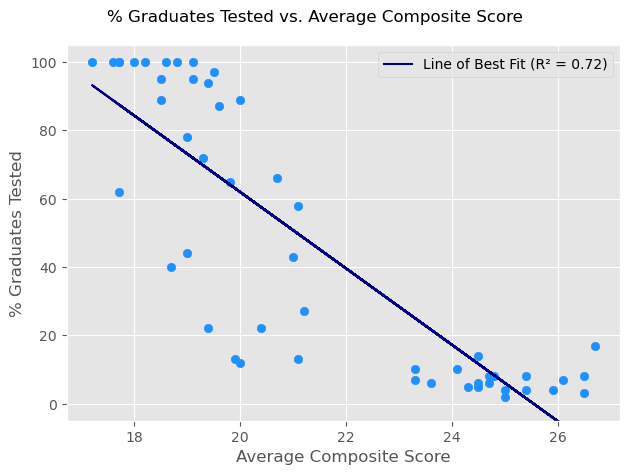

In [3]:
plt.scatter(df["Average Composite Score"], df["Estimated % of Graduates Tested"],  color="DodgerBlue")
slope, intercept, rvalue, pvalue, stderr = stats.linregress(df["Average Composite Score"], df["Estimated % of Graduates Tested"])
line = slope * df["Average Composite Score"] + intercept
plt.plot(df["Average Composite Score"], line, color="navy", label="Line of Best Fit (R² = " + str(round(rvalue**2, 2)) + ")", )
plt.ylim(-5, 105)
plt.suptitle("% Graduates Tested vs. Average Composite Score")
plt.xlabel("Average Composite Score")
plt.ylabel("% Graduates Tested")
plt.legend()
plt.tight_layout()

### ELA vs. STEM Benchmark Achievement
This chart expands upon some of the conclusions made from the previous figure. This chart is designed to show achievement of test takers with a two score system of STEM and ELA. The STEM index was a combination of the math and reading benchmarks while the ELA index was a combination of the english and reading benchmarks. As you can see these two types of achievement are highly correlated because they are both indicators of the quality of education in a state. While this result is likely already expected, the chart gets more interesting when you look at the points. The size of the data points is dependent on what percent of graduates took the ACT and allows the figure to represent how mandatory test taking affects scores. There are two distinct groups visible in this chart. One group comprises of states with STEM benchmarks below 50% and ELA benchmarks below 60%. The other comprises of benchmarks above those cutoffs. The lower group primarily comprises of states with a high to medium volume of test takers while the higher group is made up of states with low amounts of test takers. In addition, the points or colored to correspond with the average scores.

In [4]:
df["Stem"] = (df["% Meeting Math Benchmark (22)"] + df["% Meeting Science Benchmark (23)"]) / 2
df["ELA"] = (df["% Meeting English Benchmark (18)"] + df["% Meeting Reading Benchmark (22)"]) / 2

px.scatter(df, "Stem", "ELA", hover_name="State", size="Estimated % of Graduates Tested", labels={"Stem": "% Meeting Stem Benchmark", "ELA": "% Meeting ELA Benchmark"}, title="ELA vs. STEM Benchmark Achievement", color="Average Composite Score", color_continuous_scale="BluGrn").update_layout(coloraxis_showscale=False)

### Conclusion
I think the primary conclusion from this research is that the factors surrounding standardized testing highly influence the results and that this is not an indicator of education quality in all places. Mandatory testing and culture differences highly affect these outcomes. In states without the ACT as the primary college readiness exam, it is often seen that only top scorers or people with higher access to resources are taking this test. In just the last year, many top colleges have moved away from test-optional policies to test-required policies which indicates that these standardized tests are still great indicators of college readiness, but it should be noted how these scores are not always reflective of overall college readiness in a state.